In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# I. Data Description and Basic Info

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

* There are 891 entries of data and 12 variables.

### Data dictionary

In [5]:
d = {'Factor': train.columns,"Description" : ["Passenger ID","Survived or not. = No, 1 = Yes", 
                                              "Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd",
                                              "Name","Sex","Age","number of siblings or spouses aboard the Titanic",
                                              "number of parents or children aboard the Titanic",
                                              "Ticket number","Passenger fare","Cabin number",
                                              "Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton."]}
df_dis = pd.DataFrame(data = d)
df_dis

,Factor,Description
0,PassengerId,Passenger ID
1,Survived,"Survived or not. = No, 1 = Yes"
2,Pclass,"Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd"
3,Name,Name
4,Sex,Sex
5,Age,Age
6,SibSp,number of siblings or spouses aboard the Titanic
7,Parch,number of parents or children aboard the Titanic
8,Ticket,Ticket number
9,Fare,Passenger fare


### Description of numeric data

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Description of categorical data

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# II. Analysis of relationships between the variables

### Correlation between the variables

In [5]:
corr = train.corr() # shows only numerical variables
corr = corr.replace(1.0, np.nan)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,NaN,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,NaN,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,NaN,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,NaN,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,NaN,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,NaN,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,NaN


* Positive Correlation: both variables change in the same direction.
* Neutral Correlation: No relationship in the change of the variables.
* Negative Correlation: variables change in opposite directions.

In [9]:
corr.min() # negative correlations

PassengerId   -0.057527
Survived      -0.338481
Pclass        -0.549500
Age           -0.369226
SibSp         -0.308247
Parch         -0.189119
Fare          -0.549500
dtype: float64

In [10]:
corr.min().idxmin(), corr[corr.min().idxmin()].idxmin() # the most negative correlation

('Pclass', 'Fare')

In [11]:
corr.min().min()

-0.5494996199439076

Therefore, the variable Pclass and Fare are highly correlated with the negative correlation -0.5495.

In [12]:
corr.max() # positive correlations

PassengerId    0.036847
Survived       0.257307
Pclass         0.083081
Age            0.096067
SibSp          0.414838
Parch          0.414838
Fare           0.257307
dtype: float64

In [13]:
corr.max().idxmax(), corr[corr.max().idxmax()].idxmax() # the most positive correlation

('SibSp', 'Parch')

In [14]:
corr.max().max()

0.41483769862015624

Therefore, the variable SibSp and Parch are highly correlated with the positive correlation 0.4148.

In [4]:
%matplotlib inline
import seaborn as sns

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

NameError: name 'corr' is not defined

In [16]:
train.isnull().values.any()

True

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.isnull().sum().sum()

866

In [6]:
new_train = train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'])
new_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


# III. Visualizations

## Pclass

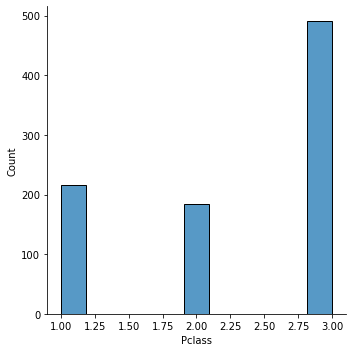

In [33]:
sns.displot(new_train,x='Pclass') #histogram of Pclass Variable

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

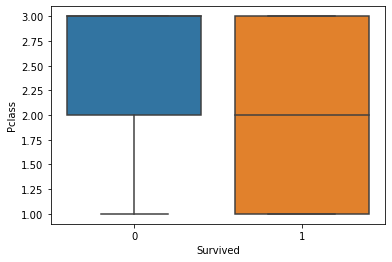

In [35]:
 sns.boxplot(x='Survived',y='Pclass', data = new_train) #box plot of Pclass separated by whether they survived or not

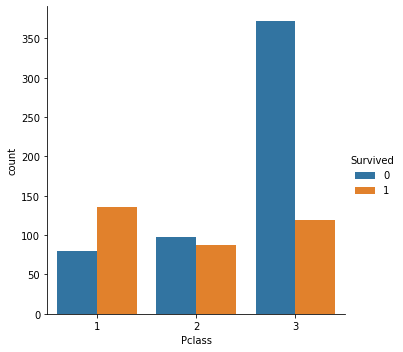

In [36]:
sns.catplot(x='Pclass',hue='Survived',data=new_train,kind="count") #histogram of Pclass based on Survival

It seems that around the same amount from each class survived, but more people in the $3^{rd}$ ticket class did not survive.

## Sex

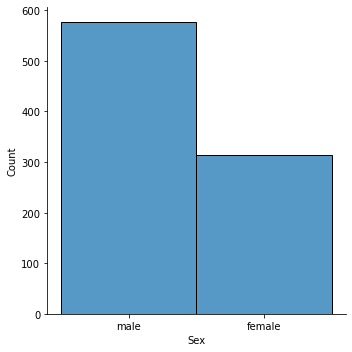

In [37]:
sns.displot(new_train,x='Sex') #histogram of Sex Variable

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

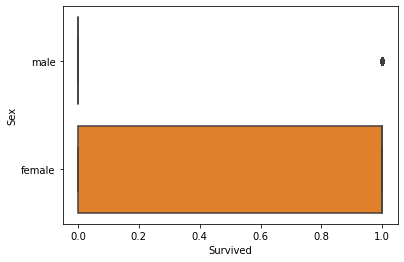

In [38]:
sns.boxplot(x='Survived',y='Sex', data = new_train) #box plot of Sex separated by whether they survived or not

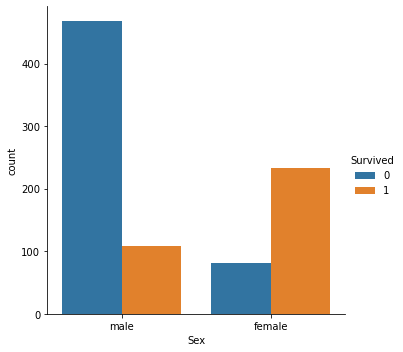

In [40]:
sns.catplot(x='Sex',hue='Survived',data=new_train,kind="count") #histogram of Sex based on Survival

Females had a higher proportion of survival.

## Age

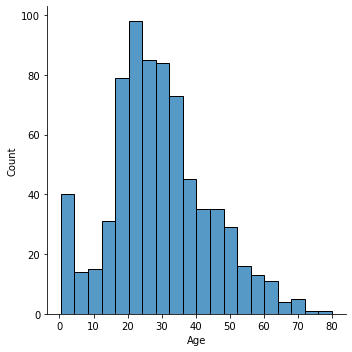

In [41]:
sns.displot(new_train,x='Age') #histogram of Sex Variable

<AxesSubplot:xlabel='Survived', ylabel='Age'>

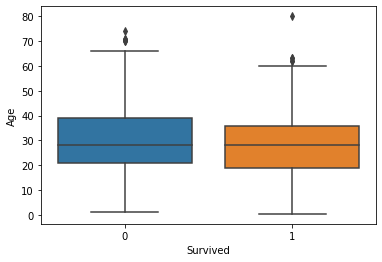

In [43]:
sns.boxplot(x='Survived',y='Age', data = new_train) #box plot of Age separated by whether they survived or not

Both of the boxplots look similar to one another. 

## Fare

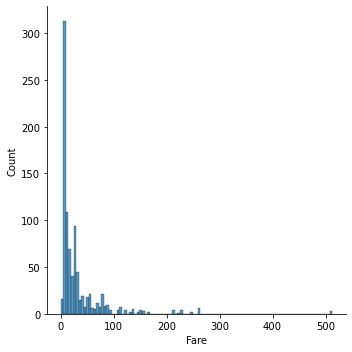

In [50]:
sns.displot(new_train,x='Fare') #histogram of Fare Variable

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

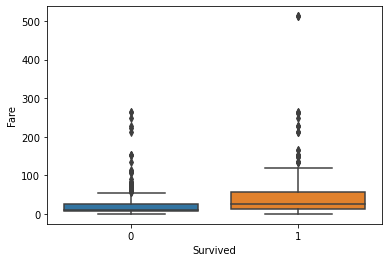

In [51]:
sns.boxplot(x='Survived',y='Fare', data = new_train) #box plot of Fare separated by whether they survived or not

Survival seems to favor the higher fares.

## Embarked

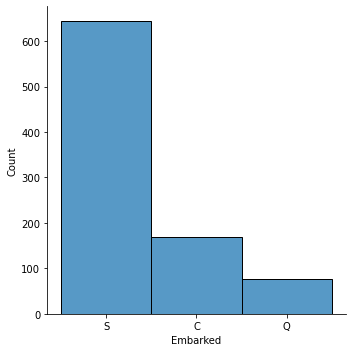

In [54]:
sns.displot(new_train,x='Embarked') #histogram of Fare Variable

<AxesSubplot:xlabel='Survived', ylabel='Embarked'>

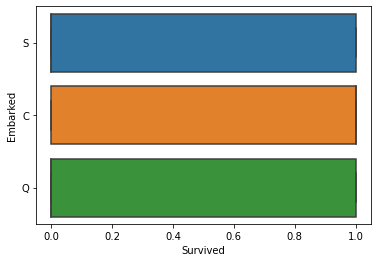

In [55]:
sns.boxplot(x='Survived',y='Embarked', data = new_train) #box plot of Embarked separated by whether they survived or not

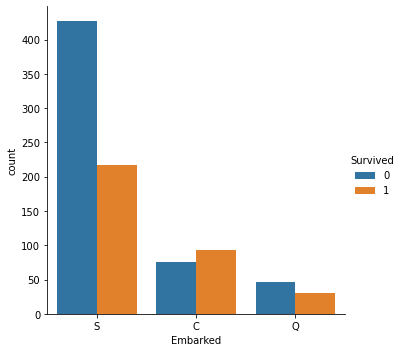

In [56]:
sns.catplot(x='Embarked',hue='Survived',data=new_train,kind="count") #histogram of Embarked based on Survival

The only significant difference in proportion is when the Port of Embartkation was in Southampton.

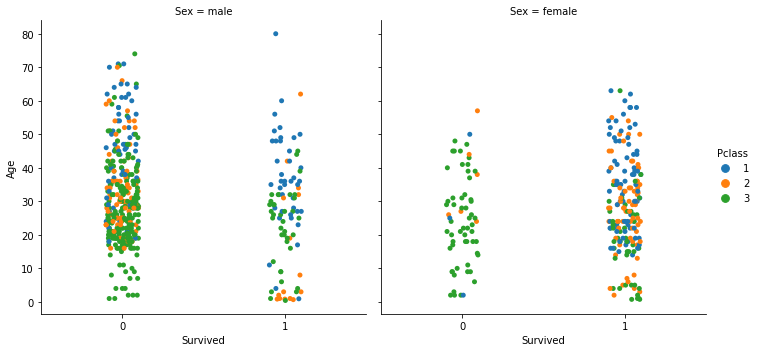

In [11]:
#sns.scatterplot(x='Age', y='Survived', data=new_train,hue='Pclass', style='Sex')
sns.catplot(y='Age',x='Survived',col='Sex',hue='Pclass',data=new_train)